# Análisis de datos sobre IRIS

![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEimmGMPw0jM_8xjndEHLKj7Hf5fngvWFOJ6_V4jiFb-U0sCHej3aTu08htye1_BgUBGKfnszHoeI_OLLZVf6NjwaG9oDYyOqkjdjeDajd3zg8VuCLVTzDM8hO2XEnarwQeM-CLvFgAwfNX53GR_HPatNPkUH7-7FAoNgFKjw7ujB9LwW5piE8GIPLjJHw/s722/irir_flowers.png)

Estos conjuntos de datos consisten en 3 tipos diferentes de iris (Setosa, Versicolor y Virginica) con longitud de pétalos y sépalos.

El conjunto de datos de la flor del Iris o conjunto de datos del Iris de Fisher es un conjunto de datos multivariante utilizado y hecho famoso por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936.

El uso de mediciones múltiples en problemas taxonómicos como ejemplo de análisis discriminante lineal.

## Diccionario de Variables

|Nombre Variable	| Rol	|Tipo	|Descripción|	Unidades|	Missing|
|---|---|---|---|---|---|
|sepal length|	Feature|	Continua|	longitud del sépalo	|cm|	no|
|sepal width|	Feature|	Continua|	anchura del sépalo	|cm|	no|
|petal length|	Feature|	Continua|	longitud del pétalo	|cm|	no|
|petal width|	Feature|	Continua|	anchura del pétalo	|cm|	no|
|class	|Target|	Categorica|	clase de iris: Iris Setosa, Iris Versicolour, o Iris Virginica|0,1,2|		no|

## Preparación y Carga de datos

### Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

## Carga de datos

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
variables = pd.DataFrame(data['data'],columns=data['feature_names'])
variables.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
variables['clase'] = data['target']

In [6]:
# dict(zip(range(len(data['target_names'])),data['target_names']))

In [7]:
variables['clase'].replace({0:'setosa',1:'versicolor',2:'virginica'})

variables.to_parquet('iris.parquet',index=False) # Guardar dataframe

In [8]:
df = pd.read_parquet("iris.parquet")

### Verificación inicial

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   clase              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
clase                0
dtype: int64

Se observa que no presenta Missing

In [11]:
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


el duplicado observado posiblemente sea por la escala

### Observaciones
1. No hay nulos
2. Aunque hay duplicados podemos asumir que es por la escala o la proporción
3. Los tipos de datos están correctos.

## Limpieza y Preprocesado

#### Preprocesado

 **Feature Engineer**


In [12]:
df['area sepal (cm2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['area petal (cm2)'] = df['petal length (cm)'] * df['petal width (cm)']

Se crean las columnas de area del petal y area del sepal

In [13]:
# clase = df.pop('clase')

In [14]:
# df = pd.concat([df,clase],axis='columns')

In [15]:
df = df[['sepal length (cm)','sepal width (cm)',
         'area sepal (cm2)','petal length (cm)',	
         'petal width (cm)', 'area petal (cm2)', 'clase']]

In [16]:
# clase = df.pop('clase')

# df.insert(0,'clase',clase)
# df

In [17]:
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,0
1,4.9,3.0,14.70,1.4,0.2,0.28,0
2,4.7,3.2,15.04,1.3,0.2,0.26,0
3,4.6,3.1,14.26,1.5,0.2,0.30,0
4,5.0,3.6,18.00,1.4,0.2,0.28,0
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,2
146,6.3,2.5,15.75,5.0,1.9,9.50,2
147,6.5,3.0,19.50,5.2,2.0,10.40,2
148,6.2,3.4,21.08,5.4,2.3,12.42,2


## Observaciones

1. Se crearon 2 variables nuevas que representan el area de cada parte de la flor

## Análisis Descriptivo

In [18]:
df.describe()

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2),clase
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,17.822867,3.758000,1.199333,5.794067,1.000000
std,0.828066,0.435866,3.361854,1.765298,0.762238,4.712390,0.819232
min,4.300000,2.000000,10.000000,1.000000,0.100000,0.110000,0.000000
25%,5.100000,2.800000,15.660000,1.600000,0.300000,0.420000,0.000000
50%,5.800000,3.000000,17.660000,4.350000,1.300000,5.615000,1.000000
75%,6.400000,3.300000,20.325000,5.100000,1.800000,9.690000,2.000000
max,7.900000,4.400000,30.020000,6.900000,2.500000,15.870000,2.000000


In [19]:
df['clase'].value_counts(normalize=True)

clase
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

ValueError: num must be an integer with 1 <= num <= 6, not 7

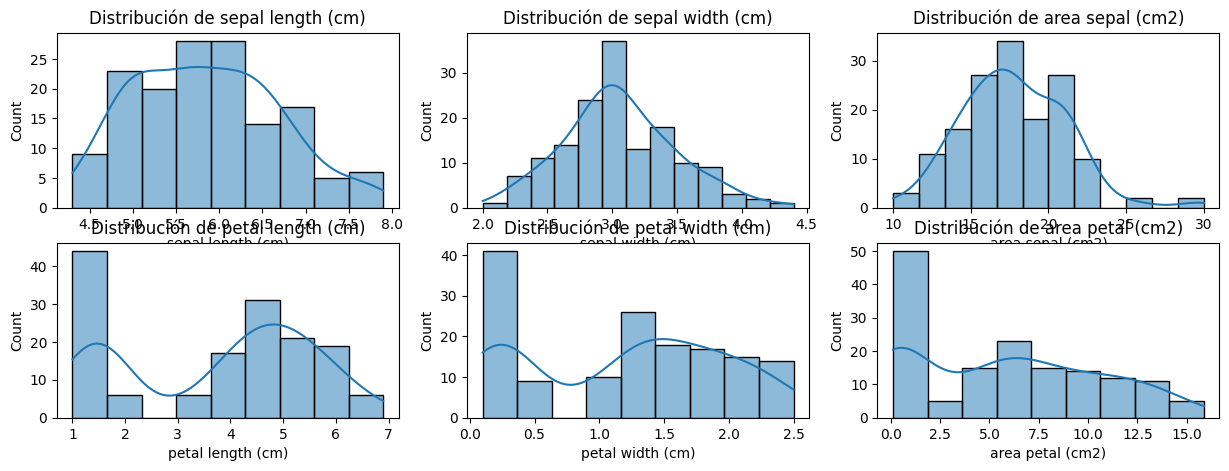

In [20]:
plt.figure(figsize=(15,5))

for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df,x=feature, kde=True)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show();
    

### Hallazgos Descriptivos
- Dataset perfectamente balanceado (50 muestras por especie)
- Las medidas de los pétalos tienen mayor variabilidad que las de los sépalos
- Los rangos de medidas son:
  * Sépalo: 4.3-7.9 cm (largo), 2.0-4.4 cm (ancho), 10.0-30.0 cm2 (area)
  * Pétalo: 1.0-6.9 cm (largo), 0.1-2.5 cm (ancho), 0.1-15.9 cm2 (area)

## Análisis Exploratorio

In [21]:
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,0
1,4.9,3.0,14.70,1.4,0.2,0.28,0
2,4.7,3.2,15.04,1.3,0.2,0.26,0
3,4.6,3.1,14.26,1.5,0.2,0.30,0
4,5.0,3.6,18.00,1.4,0.2,0.28,0
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,2
146,6.3,2.5,15.75,5.0,1.9,9.50,2
147,6.5,3.0,19.50,5.2,2.0,10.40,2
148,6.2,3.4,21.08,5.4,2.3,12.42,2


<Figure size 1500x500 with 0 Axes>

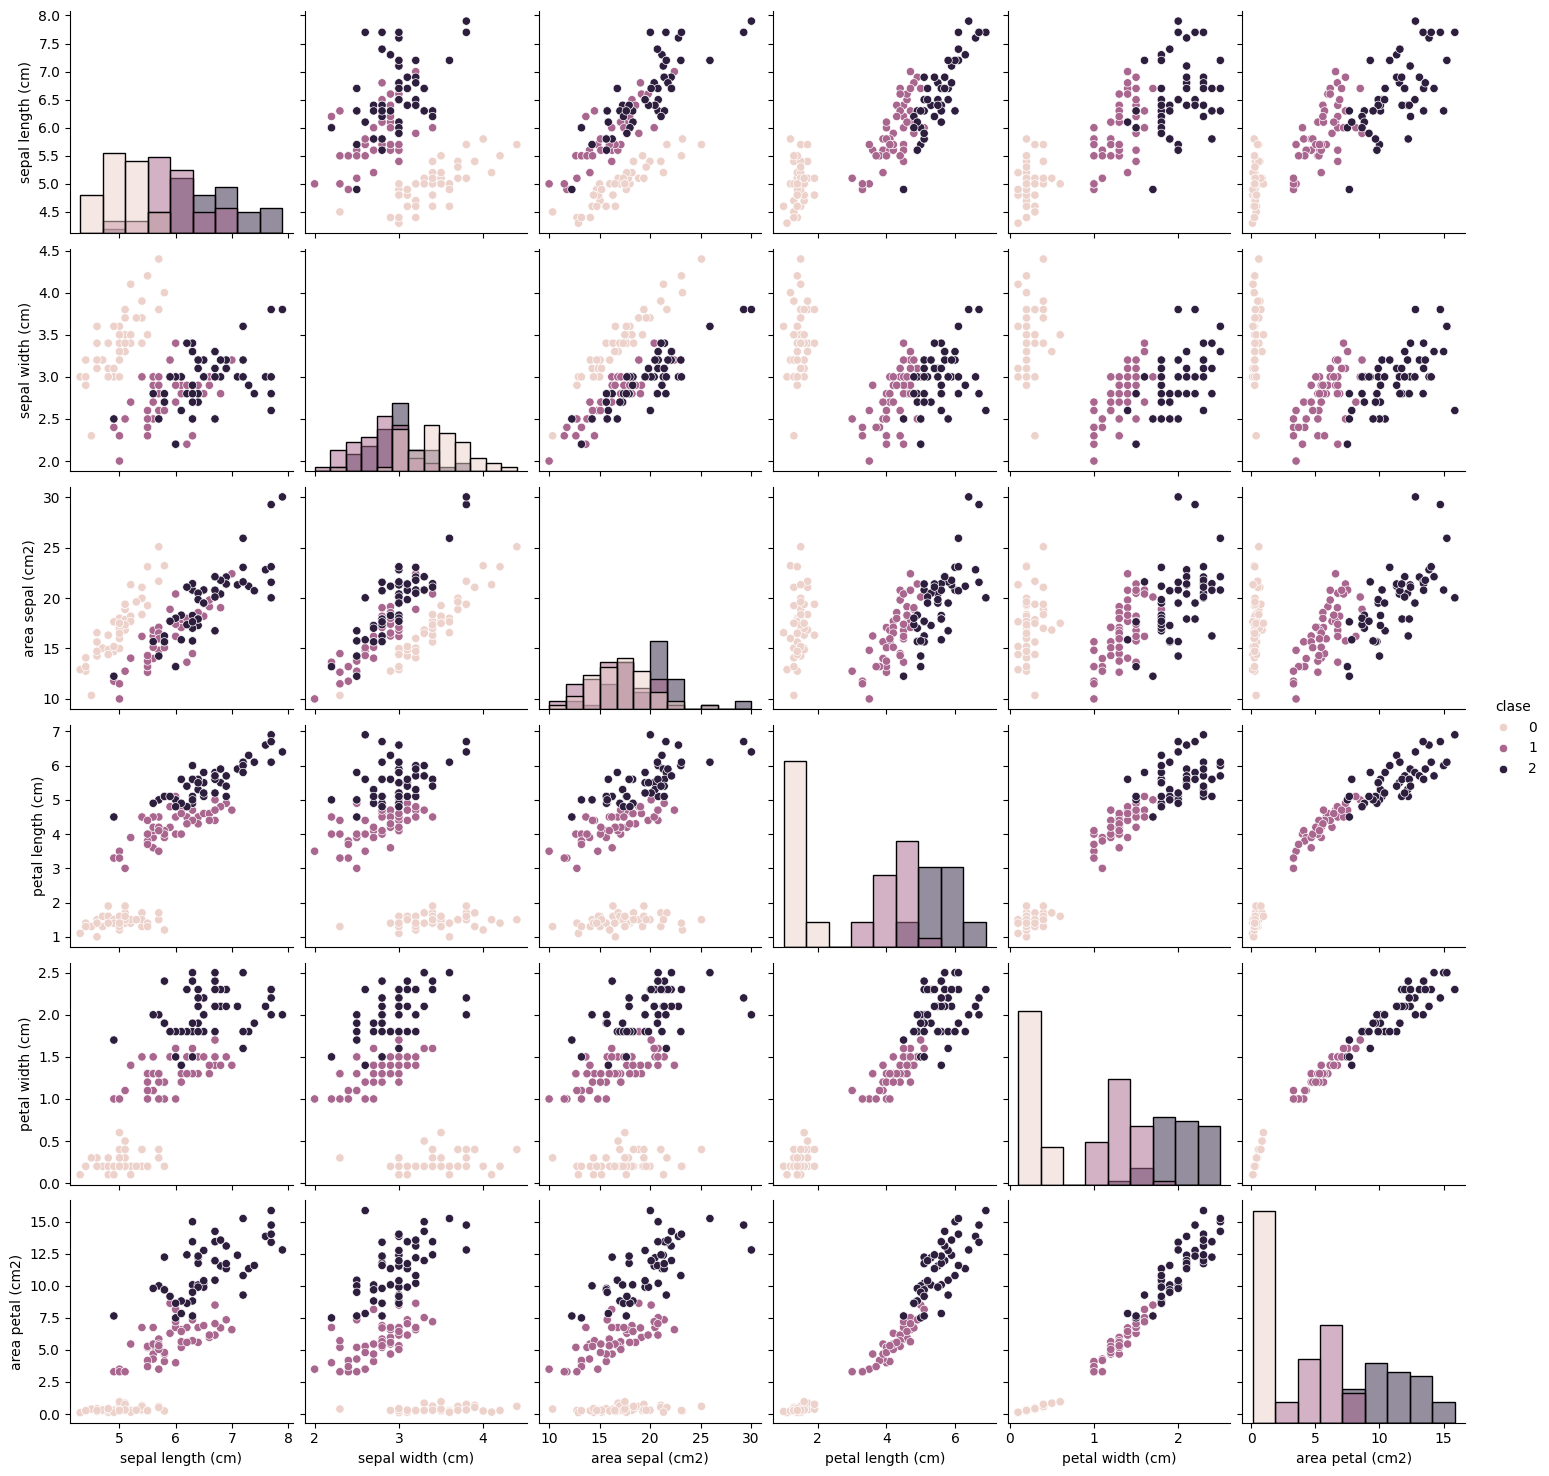

In [22]:
plt.figure(figsize=(15,5))
sns.pairplot(df, hue='clase', diag_kind='hist')
plt.show();

In [26]:
FEATURES = ['sepal length (cm)', 'sepal width (cm)', 
            'petal length (cm)','petal width (cm)']

TARGET = ['clase']

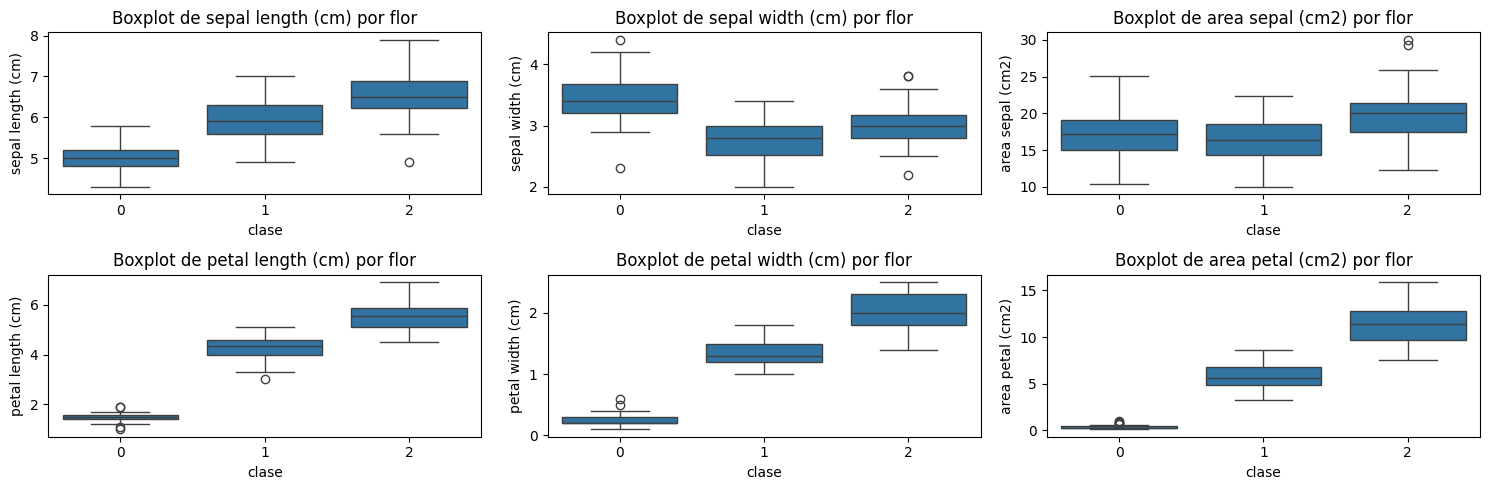

In [30]:
plt.figure(figsize=(15,5))
for i, col in enumerate(df.drop(columns='clase').columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df,x='clase', y = col)
    plt.title(f'Boxplot de {col} por flor')
plt.tight_layout()
plt.show();

In [35]:
df.drop(columns='clase').corr()

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal (cm2)
sepal length (cm),1.000000,-0.117570,0.679180,0.871754,0.817941,0.857300
sepal width (cm),-0.117570,1.000000,0.643461,-0.428440,-0.366126,-0.288431
area sepal (cm2),0.679180,0.643461,1.000000,0.360909,0.368845,0.454503
petal length (cm),0.871754,-0.428440,0.360909,1.000000,0.962865,0.958422
petal width (cm),0.817941,-0.366126,0.368845,0.962865,1.000000,0.980333
area petal (cm2),0.857300,-0.288431,0.454503,0.958422,0.980333,1.000000


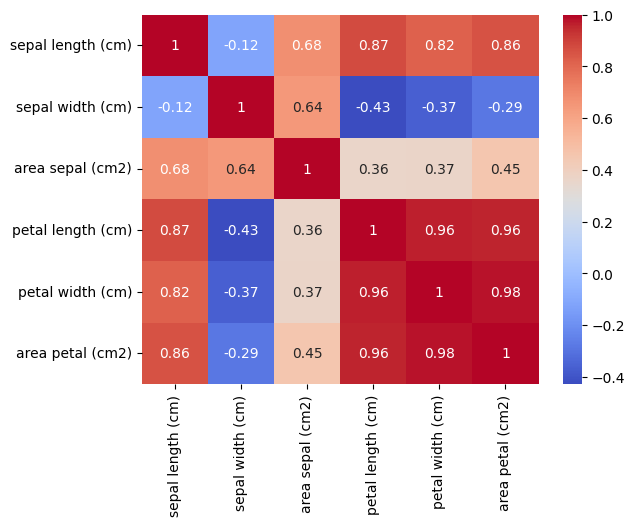

In [34]:
sns.heatmap(df.drop(columns='clase').corr(),annot=True, cmap='coolwarm');

### Hallazgos

- Existe clara separación entre setosa y las otras dos clases 
- Versicolor y virginica muestran cierto solapamiento
- Fuerte correlación entre largo y ancho de pétalo
- La flor setosa tiene pétalos notablemente mas pequeños

## Análisis Diagnóstico

### Análisis de la separabilidad de flores

In [38]:
FEATURES

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

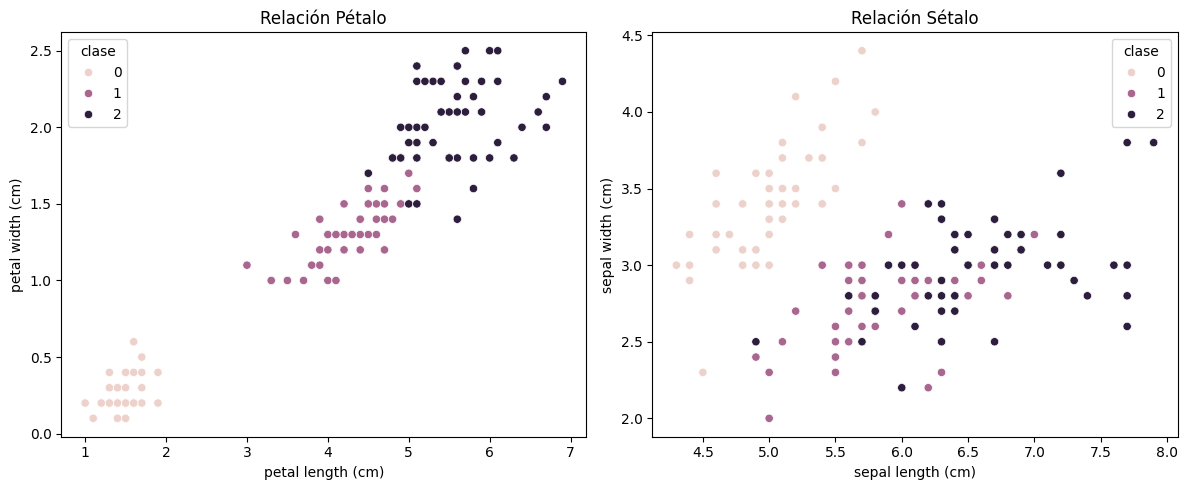

In [39]:
plt.figure(figsize=(12,5))

# Relación de Pétalo

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='clase')
plt.title('Relación Pétalo')

# Relación de Sétalo

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='clase')
plt.title('Relación Sétalo')

plt.tight_layout()
plt.show();

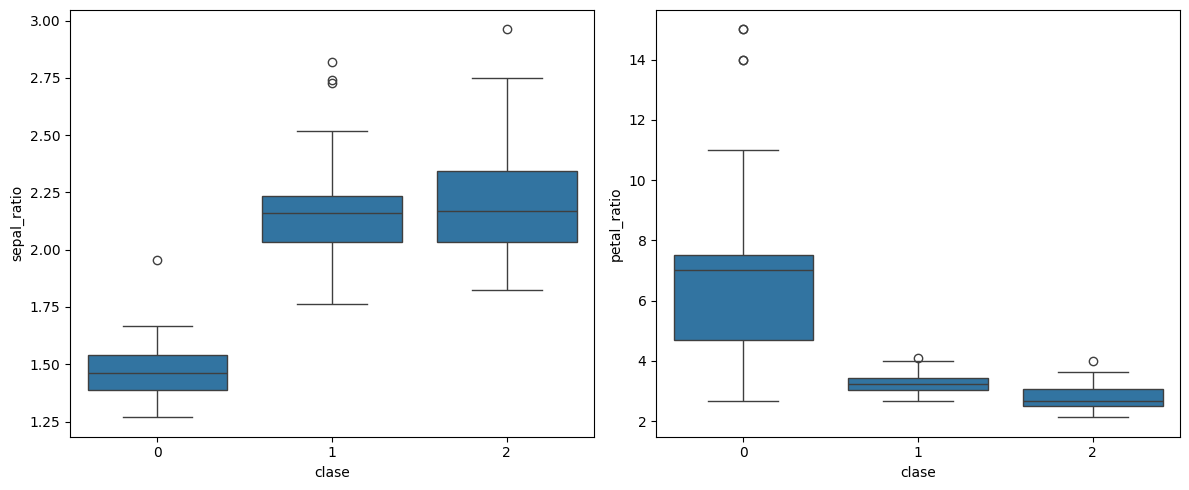

In [43]:
# Análisis de ratios

df['petal_ratio'] = df['petal length (cm)'] / df['petal width (cm)']
df['sepal_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='clase',y='sepal_ratio')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='clase',y='petal_ratio')
plt.tight_layout()
plt.show();


### Hallazgos

- Las medidas del pétalo son más útiles para distinguir especies
- Setosa es completamente separable usando medidas del pétalo
- Los ratios proporcionan información adicional para la clasificación
- La variabilidad de medidas es menor en setosa